In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from multiprocessing import cpu_count, Pool

In [2]:
#Q3(a)
#Stationary Case

In [3]:
#Stationary setting, action-value estimates: constant step, Optimistic Initial Values
def BanditSOIVc(k, ep = 0.0, t = 1000, alpha = 0.1):
    Optimal = []
    Avg_rew = []
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(5) # Initialize with optimistically high value
    for i in range(1, t+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)

        else:
            action = random.randint(0,9)
            
        Reward = np.random.normal(Q_Actual[action], 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (alpha)*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        
        Avg_rew.append(Reward) #Reward array
    return np.array(Avg_rew), np.array(Optimal)

In [4]:
#Stationary setting, action-value estimates: constant step
def Bandit(k, ep = 0.1, m = 100, alpha = 0.1):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9) #initial action
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k) #q* distribution
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (alpha)*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
    return np.array(Avg_rew), np.array(Optimal)

In [5]:
def BanditUCBS(k, ep = 0.0, m = 100, alpha = 0.1, c = 1):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9) #initial action
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k) #q* distribution
    for i in range(k):
        N.append(0.0001)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess >= ep:
            action = np.argmax(Q_estimates+np.sqrt(np.divide(np.zeros(k) + np.log(i), np.array(N))))
            
        Reward = np.random.normal(Q_Actual[action], 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (alpha)*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array

    return np.array(Avg_rew), np.array(Optimal)
    

In [6]:
# graph for average rewards
def parallel(num_simulations):
    alpha = 0.1
    Sa = np.zeros(Steps)
    Sb = np.zeros(Steps)
    Ca = np.zeros(Steps)
    Cb = np.zeros(Steps)
    Ua = np.zeros(Steps)
    Ub = np.zeros(Steps)
# num_simulations = 2000
    for i in range(num_simulations):
        avgs, opts = Bandit(10, 0.1, Steps, alpha)
        Sa = np.add(Sa, avgs)
        Sb = np.add(Sb, opts)
        avgc, optc = BanditSOIVc(10, 0.0, Steps, alpha)
        Ca = np.add(Ca, avgc)
        Cb = np.add(Cb, optc)
        avgs, opts = BanditUCBS(10, 0.0, Steps, alpha, 2)
        Ua = np.add(Ua,avgs)
        Ub = np.add(Ub,opts)
    return Sa, Sb, Ca, Cb, Ua, Ub

In [7]:
num_simulations = 2000
Steps = 1000
num_cpu = cpu_count()
pool = Pool(num_cpu)
args = [num_simulations // num_cpu for _ in range(num_cpu)]
results = pool.map(parallel, args)

In [8]:
Sa = np.zeros(Steps)
Sb = np.zeros(Steps)
Ca = np.zeros(Steps)
Cb = np.zeros(Steps)
Ua = np.zeros(Steps)
Ub = np.zeros(Steps)
for i in range(num_cpu):
    Sa += results[i][0]
    Sb += results[i][1]
    Ca += results[i][2]
    Cb += results[i][3]
    Ua += results[i][4]
    Ub += results[i][5]
del(results)

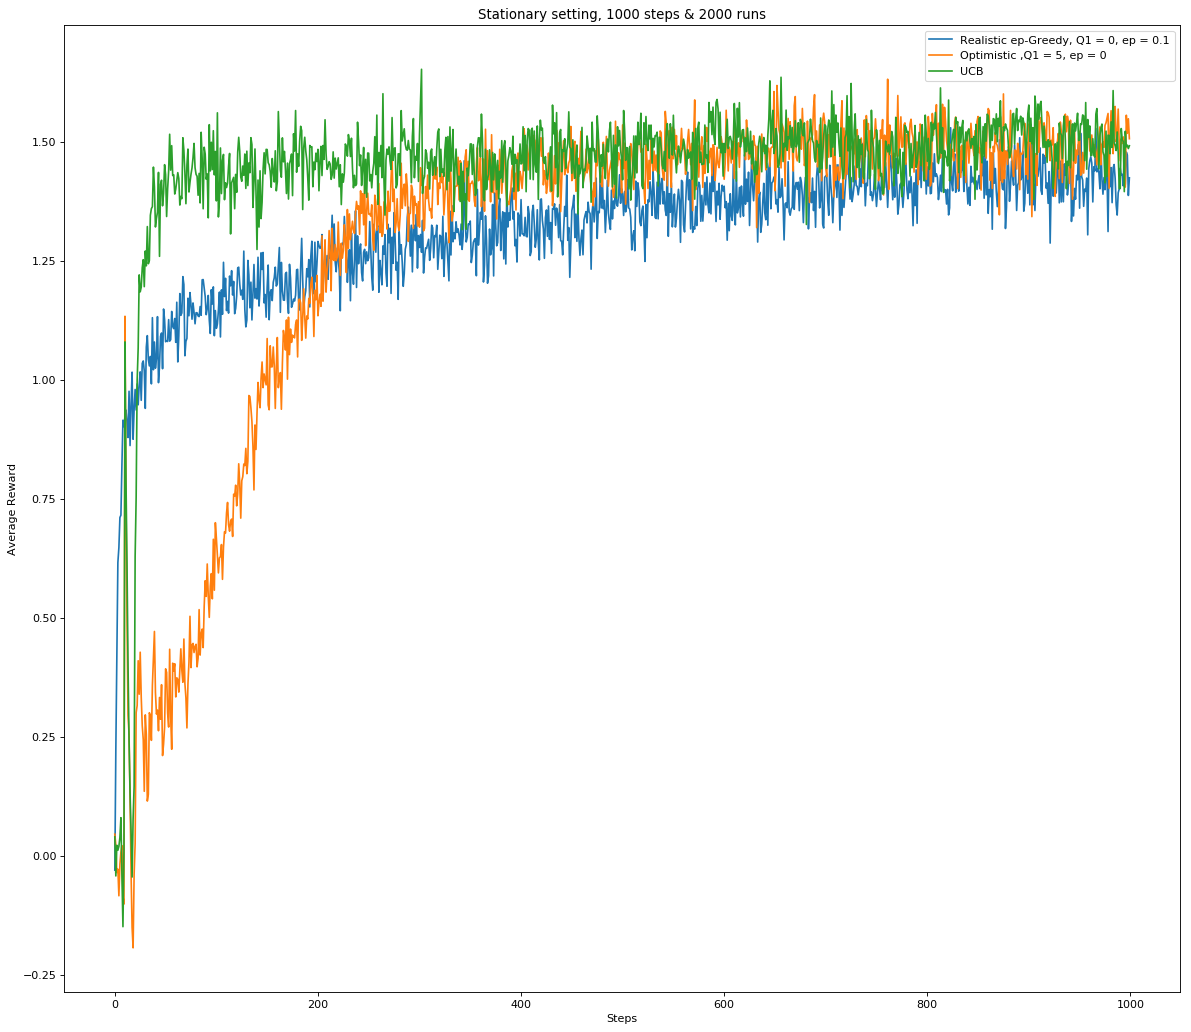

In [9]:
# graph for average rewards
avg1 = Sa/num_simulations
avg2 = Ca/num_simulations
avg3 = Ua/num_simulations
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(avg1[:1000], label = 'Realistic ep-Greedy, Q1 = 0, ep = 0.1')
plt.plot(avg2[:1000], label = 'Optimistic ,Q1 = 5, ep = 0')
plt.plot(avg3[:1000], label = 'UCB')
plt.xlabel('Steps') 
plt.ylabel('Average Reward') 
plt.title('Stationary setting, 1000 steps & 2000 runs')
plt.legend()

plt.show()

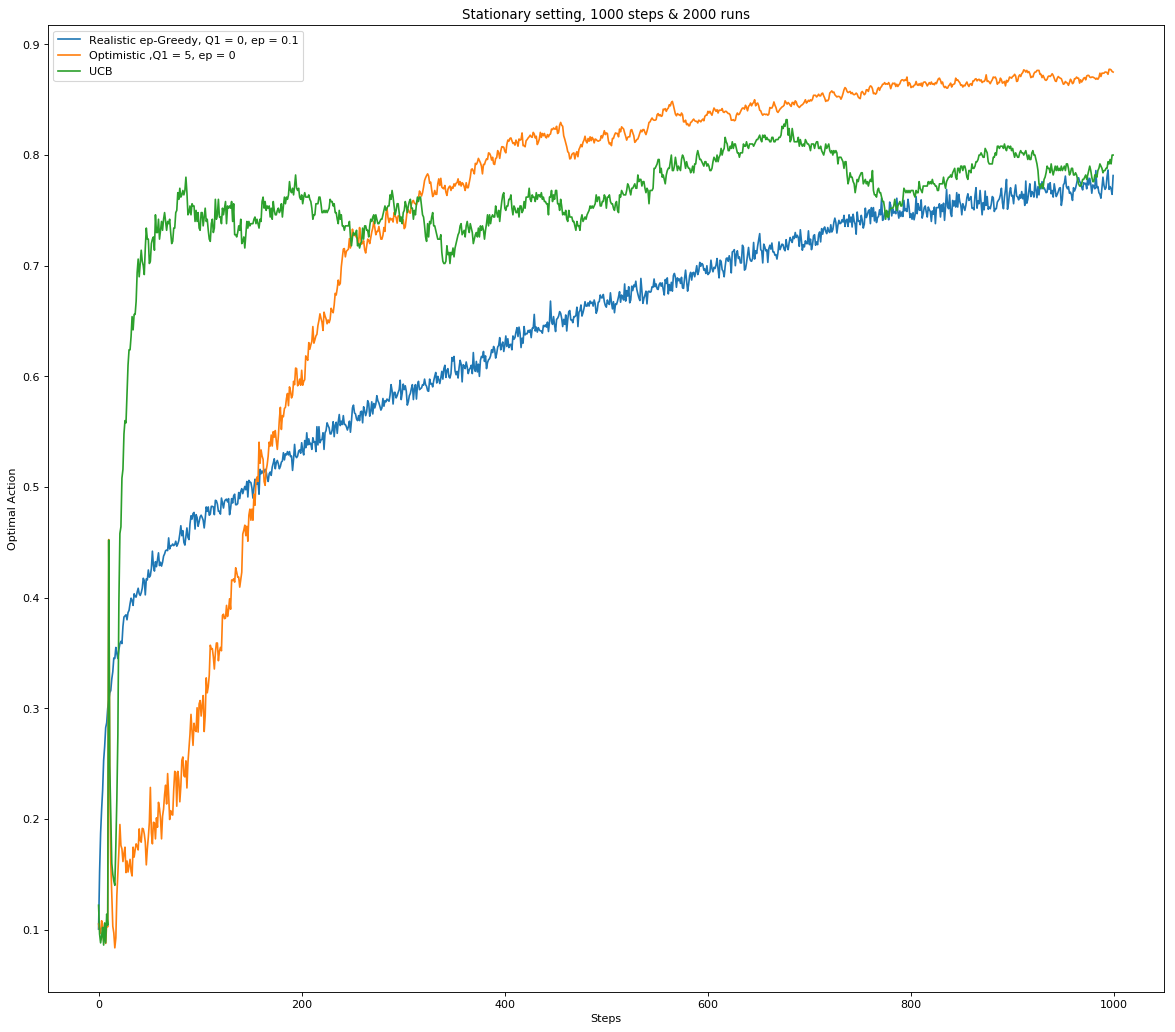

In [10]:
#Plotting optimal percentage graph
avg1 = Sb/num_simulations
avg2 = Cb/num_simulations
avg3 = Ub/num_simulations
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(avg1, label = 'Realistic ep-Greedy, Q1 = 0, ep = 0.1')
plt.plot(avg2, label = 'Optimistic ,Q1 = 5, ep = 0')
plt.plot(avg3, label = 'UCB')
plt.xlabel('Steps') 
plt.ylabel('Optimal Action') 
plt.title('Stationary setting, 1000 steps & 2000 runs')
plt.legend()
plt.show()